In [1]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 22px;
</style>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from Toy_model import *
import sys 
sys.path.append("../utils") 
from Evaluation_plot import *

## Build training data

In [5]:
toymodel = Toymodel()

In [6]:
toymodel.build_A()

In [7]:
# Build Training data
data_x, data_y, data_lace = toymodel.genarate_training_data(steps = 10, traj_num = 500, dlt_t = 0.001)

In [8]:
# Dictionary setting
mu_error_bound = 1e-8
poly = DicPoly(10)

## Original scheme

In [9]:
mu_pred, K, mu_history, err_history, koopman_history = Original_Hybrid_Method(data_x, data_y, data_lace, poly, mu_error_bound)

epoch = 0, the error is 0.331174
epoch = 1, the error is 0.291099
epoch = 2, the error is 0.255872
epoch = 3, the error is 0.224909
epoch = 4, the error is 0.197692
epoch = 5, the error is 0.173769
epoch = 6, the error is 0.152741
epoch = 7, the error is 0.134258
epoch = 8, the error is 0.118011
epoch = 9, the error is 0.103731
epoch = 10, the error is 0.091178
epoch = 11, the error is 0.080144
epoch = 12, the error is 0.070446
epoch = 13, the error is 0.061921
epoch = 14, the error is 0.054428
epoch = 15, the error is 0.047842
epoch = 16, the error is 0.042052
epoch = 17, the error is 0.036963
epoch = 18, the error is 0.032490
epoch = 19, the error is 0.028559
epoch = 20, the error is 0.025103
epoch = 21, the error is 0.022065
epoch = 22, the error is 0.019395
epoch = 23, the error is 0.017048
epoch = 24, the error is 0.014985
epoch = 25, the error is 0.013172
epoch = 26, the error is 0.011578
epoch = 27, the error is 0.010177
epoch = 28, the error is 0.008945
epoch = 29, the error is

In [10]:
np.save('plot_data/original_mu_pred.npy', mu_pred)
np.save('plot_data/original_K.npy', K)
np.save('plot_data/original_mu_history.npy', mu_history)
np.save('plot_data/original_err_history.npy', err_history)
np.save('plot_data/original_koopman_history.npy', koopman_history)

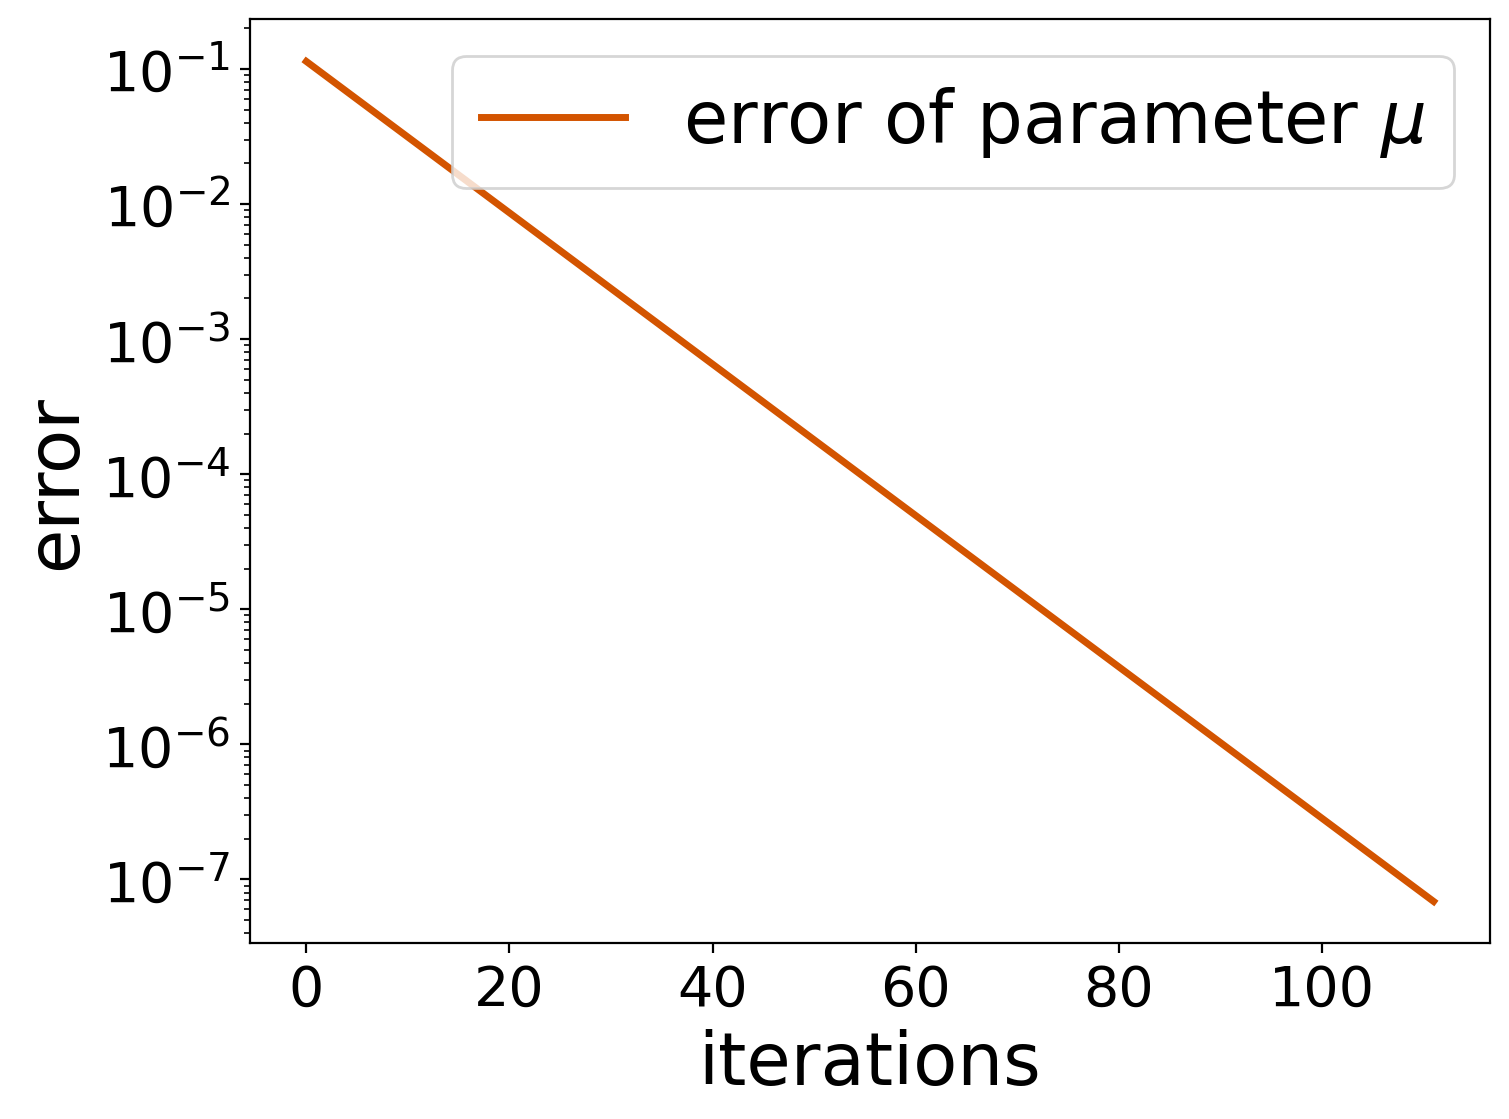

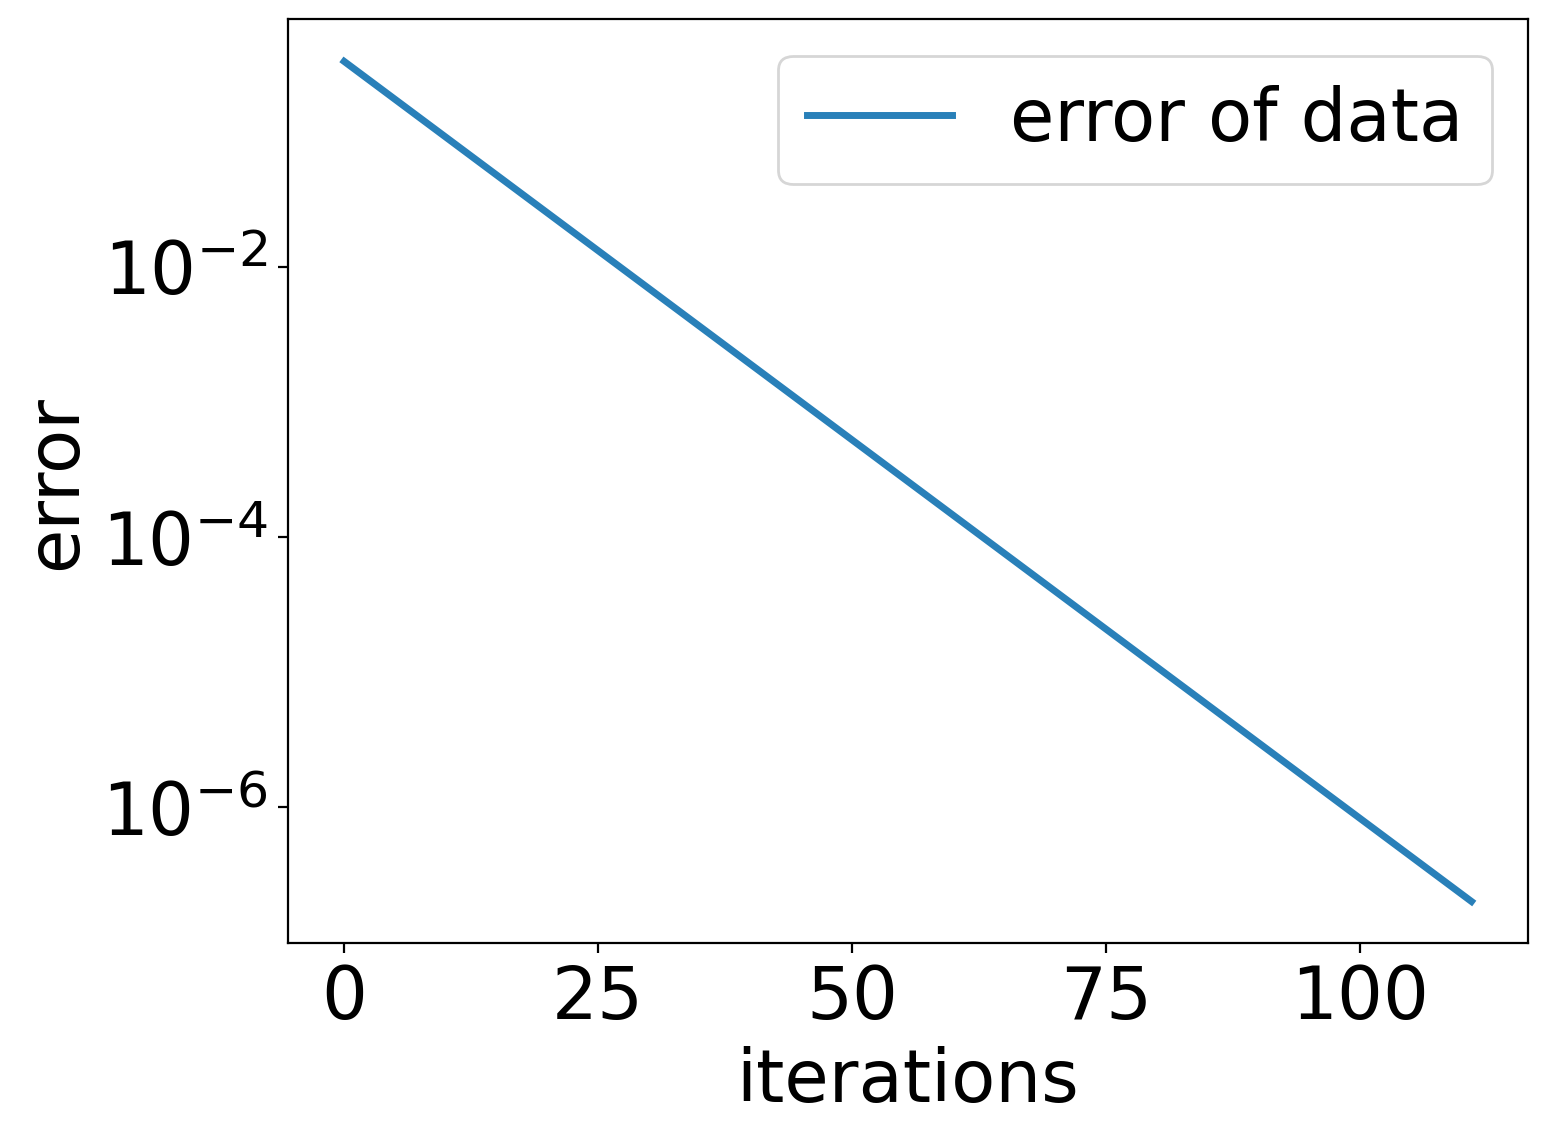

In [11]:
# Converge plot
Parameter_interate(mu_history, '$\mu$', 0.4)
error_interate(err_history)

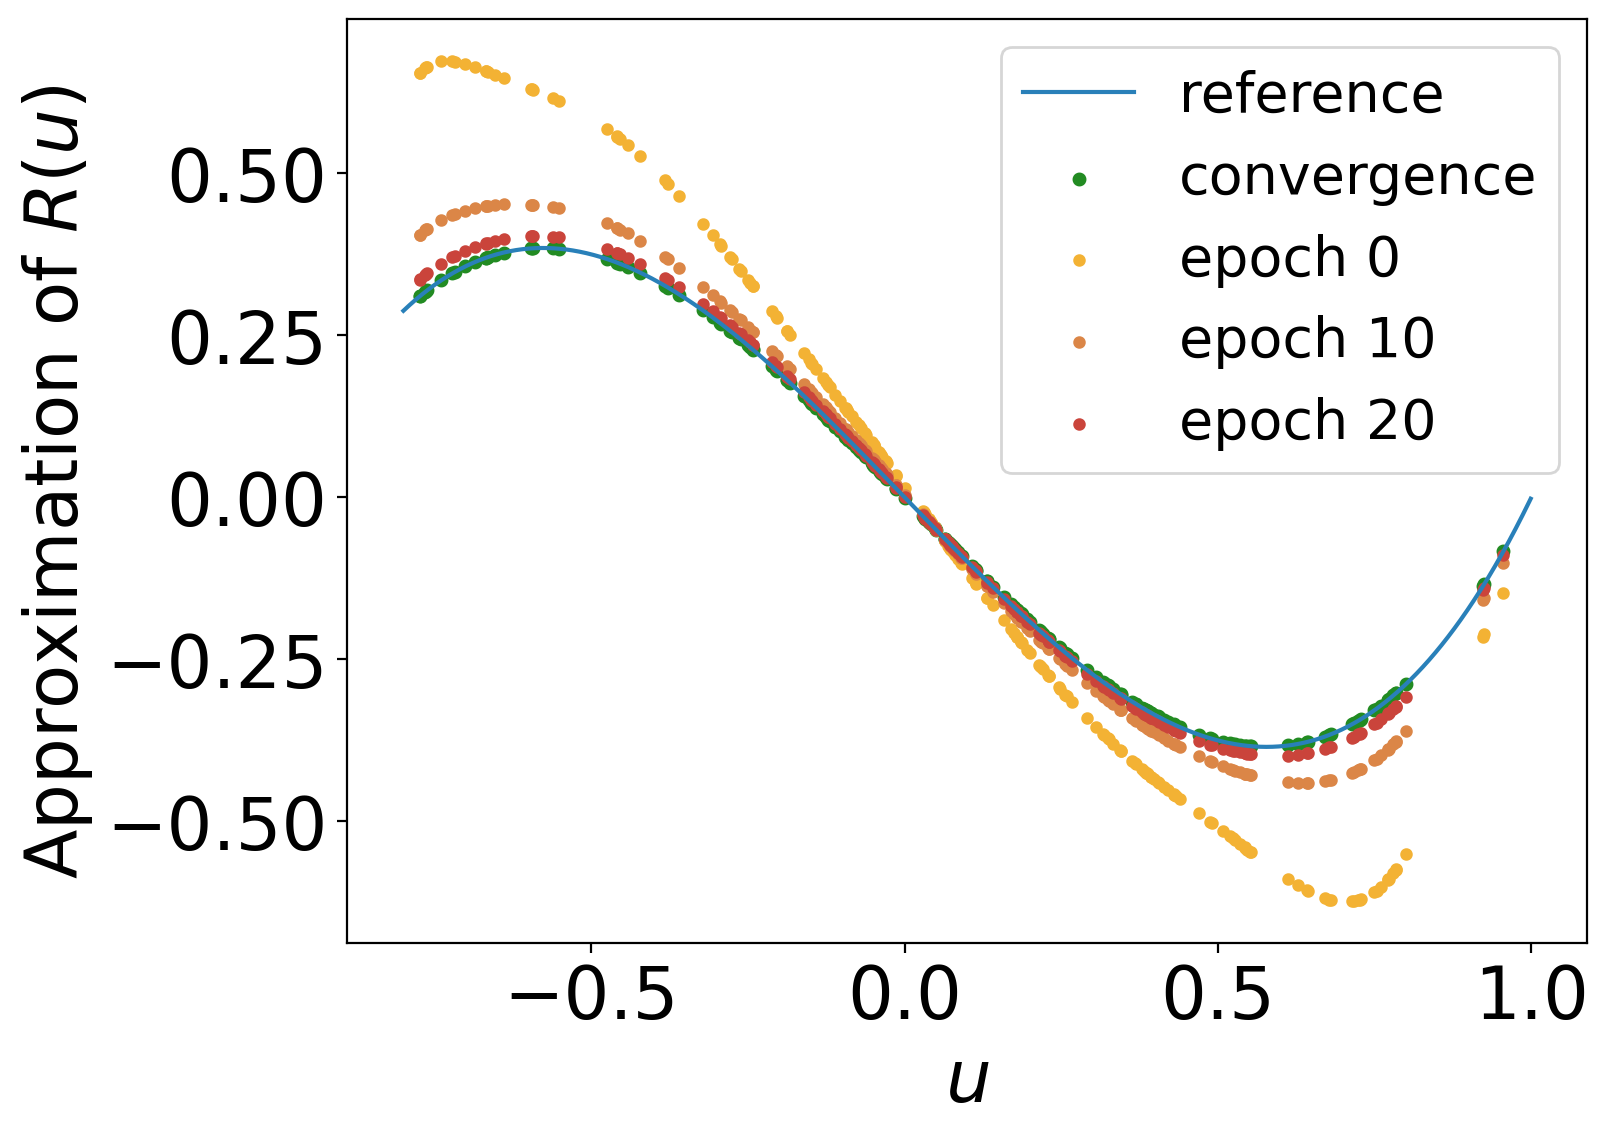

In [12]:
random_indices = np.random.choice(len(data_x), 200, replace=False)

data_x_random = data_x[random_indices]
koopman_history_our_random = koopman_history[-1][random_indices]
koopman_history_compare1_random = koopman_history[0][random_indices]
koopman_history_compare2_random = koopman_history[10][random_indices]
koopman_history_compare3_random = koopman_history[20][random_indices]

font_size = 26

x_axis = np.arange(-0.8, 1, 0.001)
plt.figure(dpi=100,figsize=(8,6))
plt.tick_params(labelsize=font_size)
plt.plot(x_axis, toymodel.reaction_term(x_axis), color = color_dict_compare['ref'], label = 'reference', linewidth=1.5)
plt.scatter(data_x_random, koopman_history_our_random - data_x_random, color=color_dict_compare['our'], marker='.', linewidths=2, label = 'convergence')
plt.scatter(data_x_random, koopman_history_compare1_random - data_x_random, color=color_dict_compare['compare1'], marker='.', linewidths=1.5, label = 'epoch 0')
plt.scatter(data_x_random, koopman_history_compare2_random - data_x_random, color=color_dict_compare['compare2'], marker='.', linewidths=1.5, label = 'epoch 10')
plt.scatter(data_x_random, koopman_history_compare3_random - data_x_random, color=color_dict_compare['compare3'], marker='.', linewidths=1.5, label = 'epoch 20')

plt.xlabel('$u$',fontsize=font_size)
plt.ylabel('Approximation of $R(u)$',fontsize=font_size)
plt.legend(fontsize=20)
plt.show()


## Prediction

In [13]:
predict_num = 50
steps = 50

In [14]:
# koopman
K_koopman = Koopman_solver(data_x, data_y, poly)
# naive
mu_1 = mu_history[1]
K_1 = Koopman_solver(data_x, data_y - np.matmul(data_lace,mu_1), poly)

In [15]:
K_linear = np.zeros(np.shape(K_koopman))

In [16]:
u_h_history = []
u_k_history = []
u_1_history = []
u_linear_history = []
u_h_traj_history = []
u_k_traj_history = []
u_1_traj_history = []
u_linear_traj_history = []
u_test_traj_history = []
for i in range(predict_num):
    u0 = np.random.rand(toymodel.dim - 1)
    u_test = toymodel.generate_traj(steps = 50, u0 = u0)
    u_hybrid = Hybrid_predictor(mu_pred, K, poly, u0, steps)
    u_koopman = Koopman_predictor(K_koopman, poly, u0, steps,state_dim=1)
    u_linear = Hybrid_predictor(mu_1, K_linear, poly, u0, steps)
    u_1 = Hybrid_predictor(mu_1, K_1, poly, u0, steps)
    u_h_history.append(np.linalg.norm(u_test - u_hybrid, ord=2, axis = 1)/np.linalg.norm(u_test, ord = 2))
    u_k_history.append(np.linalg.norm(u_test - u_koopman, ord=2, axis = 1)/np.linalg.norm(u_test, ord = 2))
    u_1_history.append(np.linalg.norm(u_test - u_1, ord=2, axis = 1)/np.linalg.norm(u_test, ord = 2))
#     u_linear_history.append(np.linalg.norm(u_test - u_linear, ord=2, axis = 1)/np.linalg.norm(u_test, ord = 2))
    u_test_traj_history.append(u_test)
    u_h_traj_history.append(u_hybrid)
    u_k_traj_history.append(u_koopman)
    u_1_traj_history.append(u_1)
    u_linear_traj_history.append(u_linear)

In [17]:
err_h = np.linalg.norm(np.array(u_h_traj_history) - np.array(u_test_traj_history))/np.linalg.norm(u_test_traj_history)
err_k = np.linalg.norm(np.array(u_k_traj_history) - np.array(u_test_traj_history))/np.linalg.norm(u_test_traj_history)
err_linear = np.linalg.norm(np.array(u_linear_traj_history) - np.array(u_test_traj_history))/np.linalg.norm(u_test_traj_history)
err_1 = np.linalg.norm(np.array(u_1_traj_history) - np.array(u_test_traj_history))/np.linalg.norm(u_test_traj_history)

print(err_h)
print(err_linear)
print(err_k)
print(err_1)

0.0003531269363418522
227.64082991049645
1.1478451446335096
0.6455823281790993


In [18]:
print(np.shape(u_h_history))

(50, 51)


In [19]:
def compute_stat_info(data):
    data_mean = np.mean(data, axis = 0)
    data_std = np.std(data, axis = 0)
    mean_plus_std = data_mean + data_std
    mean_minus_std = data_mean - data_std
    return data_mean, data_std, mean_plus_std, mean_minus_std

In [20]:
hybrid_mean, hybrid_std, hybrid_u, hybrid_l = compute_stat_info(u_h_history)
koopman_mean, koopman_std, koopman_u, koopman_l = compute_stat_info(u_k_history)
naive_mean, naive_std, naive_u, naive_l = compute_stat_info(u_1_history)

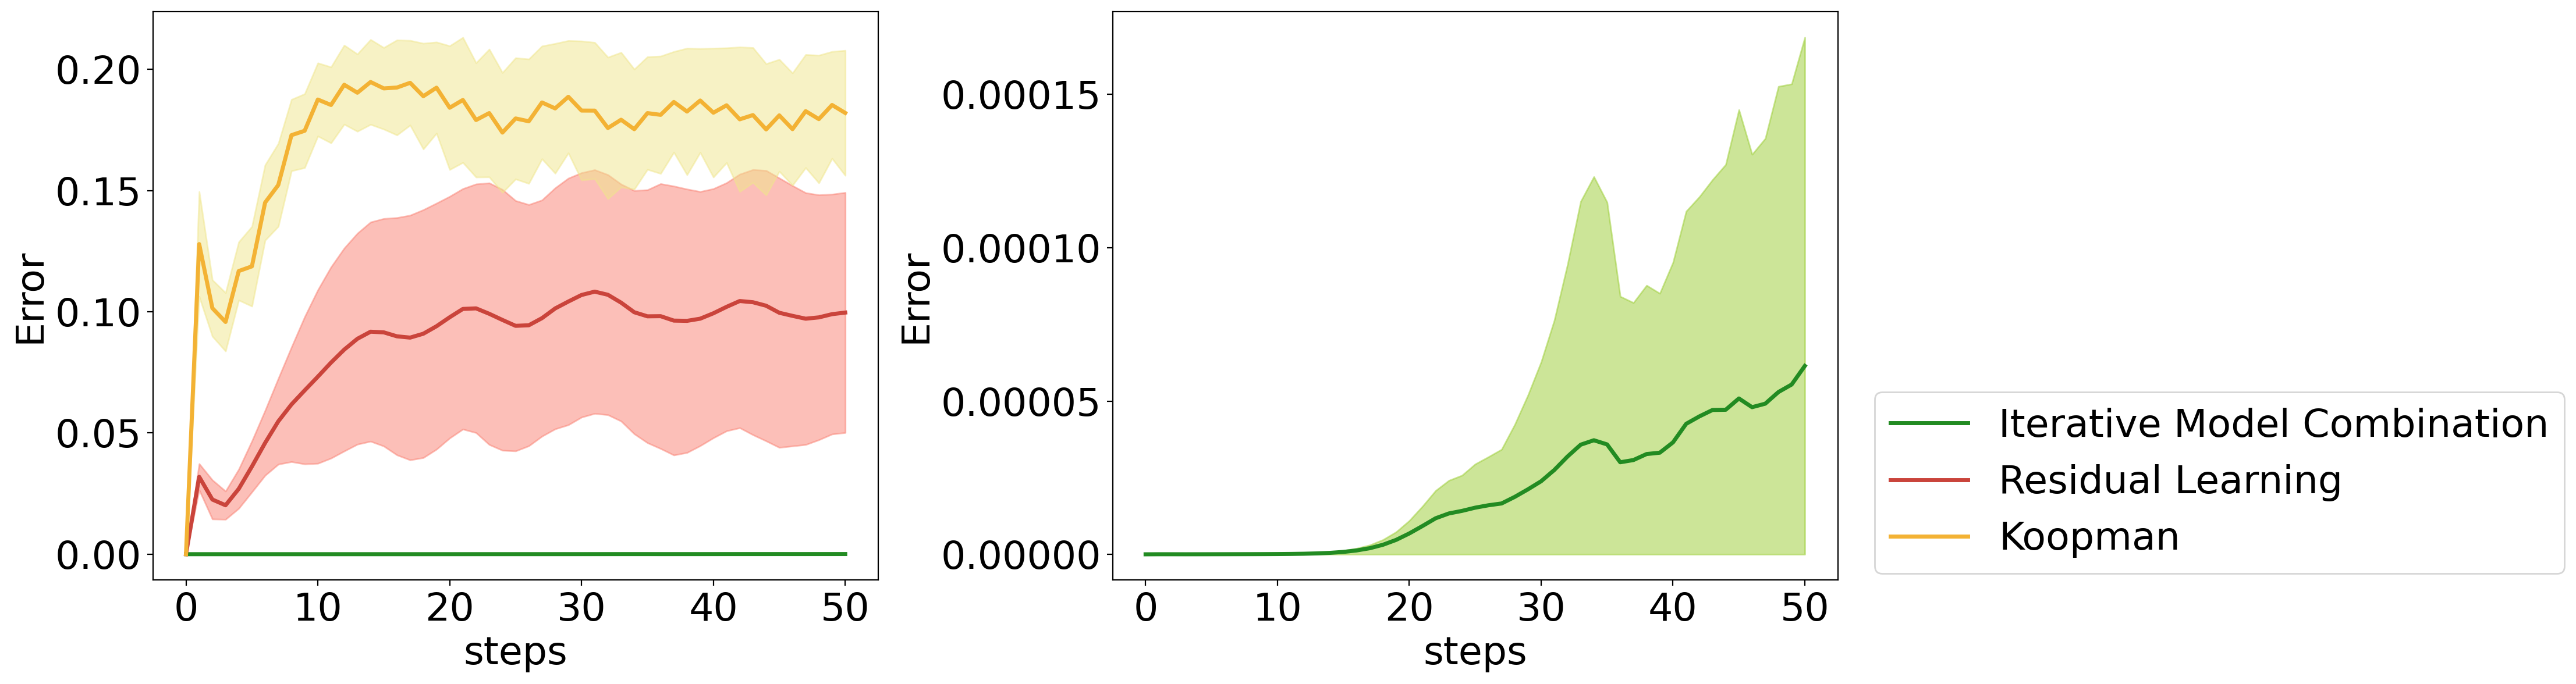

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code for data and formatting

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=100)
font_size = 24

# Plot on the left subplot
axes[0].tick_params(labelsize=font_size)
axes[0].plot(range(steps + 1), hybrid_mean, color=color_dict_compare['our'], linewidth=line_width, label='Iterative Model Combination')
axes[0].fill_between(range(steps + 1), hybrid_l, hybrid_u, color='yellowgreen', alpha=0.5)
axes[0].plot(range(steps + 1), naive_mean, color=color_dict_compare['compare3'], linewidth=line_width, label='Residual Learning')
axes[0].fill_between(range(steps + 1), naive_l, naive_u, color='salmon', alpha=0.5)
axes[0].plot(range(steps + 1), koopman_mean, color=color_dict_compare['compare1'], linewidth=line_width, label='Koopman')
axes[0].fill_between(range(steps + 1), koopman_l, koopman_u, color='khaki', alpha=0.5)
axes[0].set_xlabel('steps', fontsize=font_size)
axes[0].set_ylabel('Error', fontsize=font_size)

# Plot on the right subplot
axes[1].tick_params(labelsize=font_size)
axes[1].plot(range(steps + 1), hybrid_mean, color=color_dict_compare['our'], linewidth=line_width)
axes[1].fill_between(range(steps + 1), np.zeros(steps + 1), hybrid_u, color='yellowgreen', alpha=0.5)
axes[1].set_xlabel('steps', fontsize=font_size)
axes[1].set_ylabel('Error', fontsize=font_size)

lines, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(lines, labels, fontsize=font_size, loc='center left', bbox_to_anchor=(1, 0.3))

# Show the plot
plt.tight_layout()  # Adjust spacing
plt.show()


## Acceleration

In [24]:
mu_pred_acc, K_acc, mu_history_acc, err_history_acc, koopman_history_acc = Relaxed_Hybrid_Method(data_x, data_y, data_lace, poly, mu_error_bound)

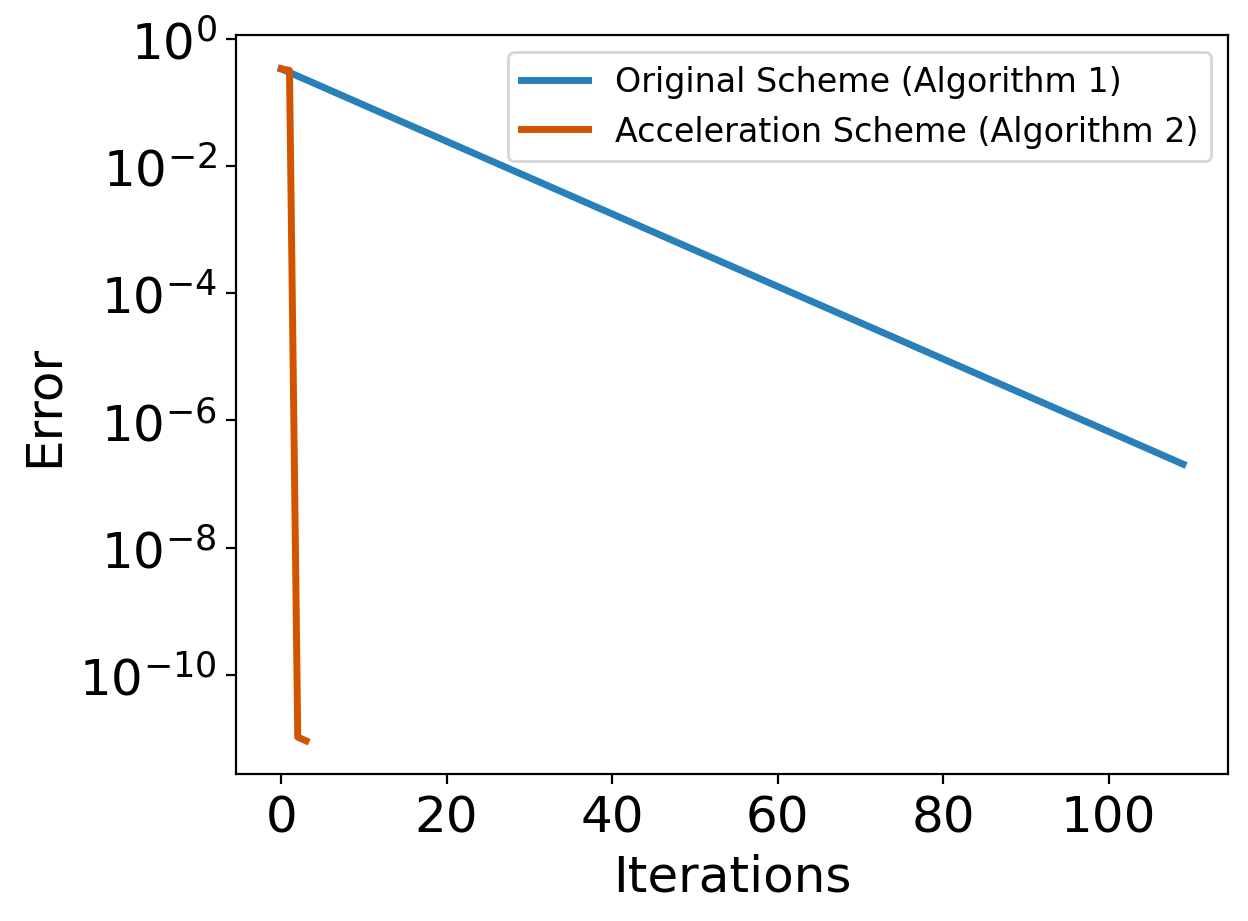

In [25]:
font_size = 18
plt.tick_params(labelsize=font_size)
plt.plot(range(len(err_history)), err_history, color = color_dict_single['error'],linewidth = line_width, label = 'Original Scheme (Algorithm 1)')
plt.plot(range(len(err_history_acc)), err_history_acc, color = color_dict_single['para'],linewidth = line_width, label = 'Acceleration Scheme (Algorithm 2)')
plt.xlabel('Iterations',fontsize=font_size)
plt.ylabel('Error',fontsize=font_size)
plt.yscale('log')
plt.legend(fontsize=12)
plt.show()